## Лабораторная работа 4.3.4

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
import tikzplotlib as tikz

In [30]:
def csvtotex(input, output, columns=None, rows=[-1], type=None, transp=False):
    df = pd.read_csv(input, sep=",", usecols=columns, quotechar='"', dtype=type)
    df = df[df.index.isin(rows)]
    if transp:
        df = df.transpose()
        pd.DataFrame.to_csv(df, output, sep="&", index=True)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in rows: data.write("|l")
            data.write("|l|}")
            data.write("\hline")
            content.pop(0)
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    else:
        pd.DataFrame.to_csv(df, output, sep="&", index=False)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in columns: data.write("|l")
            data.write("|}")
            data.write("\hline")
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    return df

In [31]:
def print_err(a, a_err, vis=True):
    a = np.array([a]).flatten()
    a_err = np.array([a_err]).flatten()
    val = np.zeros_like(a)
    sig = np.zeros_like(a_err)
    for i in range(a.size):
        val[i] = np.round(a[i], decimals = round(1 * (np.trunc(np.log10(a_err[i]) < 0)) - np.trunc(np.log10(a_err[i]))))
        sig[i] = np.round(a_err[i], decimals = round(1 * (np.trunc(np.log10(a_err[i]) < 0)) - np.trunc(np.log10(a_err[i]))))
        if vis: print(val[i], '\pm', sig[i])
    return val, sig

In [32]:
def T(n, x):
    return np.cos(n * np.arccos(x))

>### Определение ширины щели с помощью линзы

In [33]:
b_1 = 120
L = 125
F = 3.8
err = 1
a_1 = L * F / b_1
a_1_err = a_1 * ((err / b_1) ** 2 + (err / L) ** 2) ** 0.5
print_err(a_1, a_1_err)

3.96 \pm 0.05


(array([3.96]), array([0.05]))

In [34]:
df_exp1 = csvtotex("../data/data.csv", "../data/table1.tex", columns=(3, 4), rows=range(10))
display(df_exp1)

,"$D_1$, мм","$D$, мкм"
0,1,50
1,3,100
2,4,150
3,5,200
4,6,250
5,7,300
6,8,350
7,9,400
8,11,450
9,12,500


In [35]:
D_1 = np.array(df_exp1[df_exp1.columns[0]].values)
D_1_err = 1
D_exp1 = np.array(df_exp1[df_exp1.columns[1]].values)
D_exp1_err = 10

In [36]:
D_l = a_1 * D_1 / b_1 * 1000
sig_D_l = D_l * ((err / b_1) ** 2 + (a_1_err / a_1) ** 2 + (D_1_err / df_exp1[df_exp1.columns[0]].values) ** 2) ** 0.5

In [37]:
df_exp1_count = pd.DataFrame({'$D_{\\text{л}}$, мкм': print_err(D_l, sig_D_l, vis=False)[0], '$\sigma_{D_\\text{л}}$, мкм': print_err(D_l, sig_D_l, vis=False)[1]})
pd.DataFrame.to_csv(pd.concat([df_exp1, df_exp1_count], axis=1, join="inner"), "../data/calculated_D_l.csv", index=False)
df_exp1_full = csvtotex("../data/calculated_D_l.csv", "../data/table1.tex", columns=range(4), rows=range(10), transp=True)
display(df_exp1_full)

,0,1,2,3,4,5,6,7,8,9
"$D_1$, мм",1.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0,12.0
"$D$, мкм",50.0,100.0,150.0,200.0,250.0,300.0,350.0,400.0,450.0,500.0
"$D_{\text{л}}$, мкм",30.0,100.0,130.0,160.0,200.0,230.0,260.0,300.0,360.0,400.0
"$\sigma_{D_\text{л}}$, мкм",30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0


>### Определение ширины щели по её спектру

In [38]:
df_exp2 = csvtotex("../data/data.csv", "../data/table2.tex", columns=(6, 7, 8), rows=range(10))
display(df_exp2)

,"$X$, мм",$m$,"$D $, мкм"
0,113,9,100
1,168,24,150
2,216,48,200
3,208,59,250
4,208,73,300
5,207,84,350
6,98,48,400
7,74,40,450
8,74,44,500
9,74,52,550


In [39]:
X = df_exp2[df_exp2.columns[0]].values
sig_X = 1
m = df_exp2[df_exp2.columns[1]].values
sig_m = m // 20
D_exp2 = df_exp2[df_exp2.columns[2]].values
D_exp2_err = 10
L = 125
sig_L = 1
lam = 5328

In [40]:
D_s = m * lam * L / X * 10 ** (-3)
sig_D_s = D_s * ((sig_m / m) ** 2 + (sig_L / L) ** 2 + (sig_X / X) ** 2) ** 0.5

In [41]:
df_exp2_count = pd.DataFrame({'$D_{\\text{с}}$, мкм': print_err(D_s, sig_D_s, vis=False)[0], '$\sigma_{D_\\text{с}}$, мкм': print_err(D_s, sig_D_s, vis=False)[1]})
pd.DataFrame.to_csv(pd.concat([df_exp2, df_exp2_count], axis=1, join="inner"), "../data/calculated_D_s.csv", index=False)
df_exp2_full = csvtotex("../data/calculated_D_s.csv", "../data/table2.tex", columns=range(5), rows=range(10), transp=True)
display(df_exp2_full)

,0,1,2,3,4,5,6,7,8,9
"$X$, мм",113.0,168.0,216.0,208.0,208.0,207.0,98.0,74.0,74.0,74.0
$m$,9.0,24.0,48.0,59.0,73.0,84.0,48.0,40.0,44.0,52.0
"$D $, мкм",100.0,150.0,200.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0
"$D_{\text{с}}$, мкм",53.0,95.0,148.0,189.0,234.0,270.0,330.0,360.0,400.0,470.0
"$\sigma_{D_\text{с}}$, мкм",0.6,4.0,6.0,7.0,10.0,10.0,10.0,20.0,20.0,20.0


In [42]:
def fit(x, p):
    return p * x

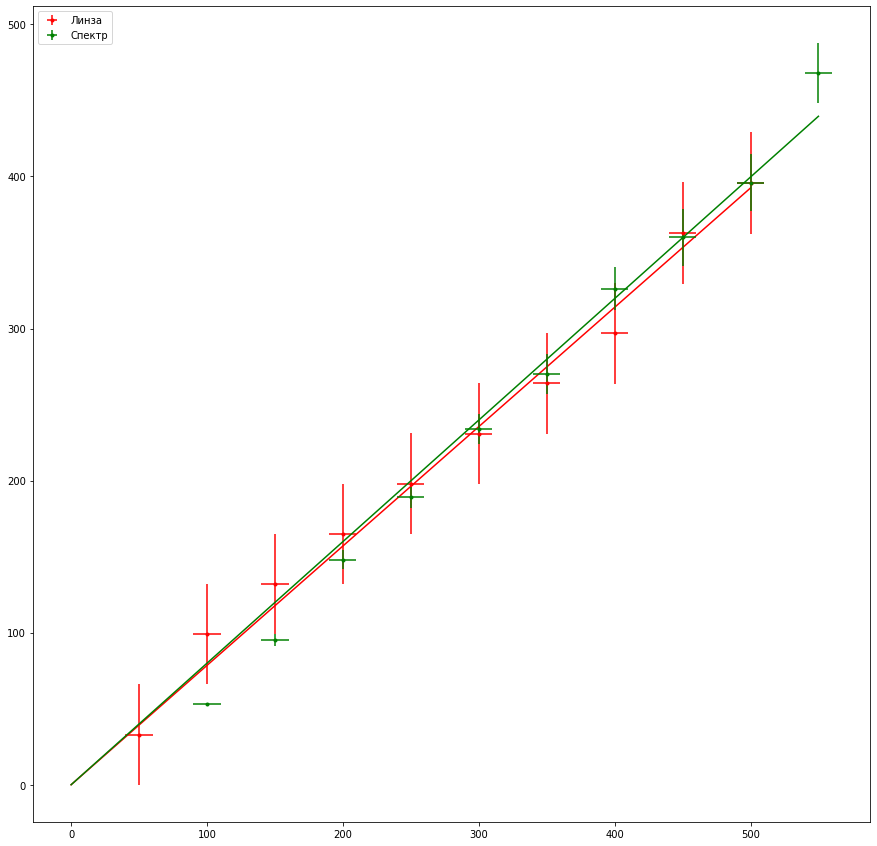

In [43]:
plt.figure(figsize=(15, 15))
plt.errorbar(D_exp1, D_l, xerr=D_exp1_err, yerr=sig_D_l, fmt='.', color='red', label='Линза')
exp1, err_exp1 = sp.curve_fit(fit, D_exp1, D_l)
plt.plot(np.linspace(0, D_exp1.max(), 2), exp1[0] * np.linspace(0, D_exp1.max(), 2), 'red')
plt.errorbar(D_exp2, D_s, xerr=D_exp2_err, yerr=sig_D_s, fmt='.', color='green', label='Спектр')
exp2, err_exp2 = sp.curve_fit(fit, D_exp2, D_s)
plt.plot(np.linspace(0, D_exp2.max(), 2), exp2[0] * np.linspace(0, D_exp2.max(), 2), 'green')
plt.legend(loc='upper left')
#tikz.save('plot1.tex')

>### Определение периода по спектру на удалённом экране

In [44]:
df_exp3 = csvtotex("../data/data.csv", "../data/table3.tex", columns=(10, 12, 11), rows=range(5))
display(df_exp3)

,№,"$X $, мм",$m $
0,1.0,218.0,3.0
1,2.0,267.0,5.0
2,3.0,241.0,10.0
3,4.0,177.0,15.0
4,5.0,92.0,10.0


In [45]:
X = df_exp3[df_exp3.columns[1]].values
sig_X = 1
m = df_exp3[df_exp3.columns[2]].values
sig_m = m // 20
lam = 5320
L = 136
sig_L = 1

In [46]:
d_c = 2 * m * lam * L / X * 10 ** (-3)
sig_d_c = d_c * ((sig_m / m) ** 2 + (sig_L / L) ** 2 + (sig_X / X) ** 2) ** 0.5

In [47]:
df_exp3_count = pd.DataFrame({'$d_{\\text{с}}$, мкм': print_err(d_c, sig_d_c, vis=False)[0], '$\sigma_{d_\\text{с}}$, мкм': print_err(d_c, sig_d_c, vis=False)[1]})
pd.DataFrame.to_csv(pd.concat([df_exp3, df_exp3_count], axis=1, join="inner"), "../data/calculated_d_c.csv", index=False)
df_exp3_full = csvtotex("../data/calculated_d_c.csv", "../data/table3.tex", columns=range(5), rows=range(5), transp=False)
display(df_exp3_full)

,№,"$X $, мм",$m $,"$d_{\text{с}}$, мкм","$\sigma_{d_\text{с}}$, мкм"
0,1.0,218.0,3.0,19.9,0.2
1,2.0,267.0,5.0,27.1,0.2
2,3.0,241.0,10.0,60.0,0.5
3,4.0,177.0,15.0,123.0,1.0
4,5.0,92.0,10.0,157.0,2.0


>### Определение периода решёток по увеличенному изображению спектра

In [48]:
df_exp4 = csvtotex("../data/data.csv", "../data/table4.tex", columns=(14, 15, 16), rows=range(5))
display(df_exp4)

,№,"$X $, мм",$m. $
0,1.0,295.0,1.0
1,2.0,196.0,1.0
2,3.0,295.0,3.0
3,4.0,355.0,7.0
4,5.0,355.0,10.0


In [49]:
X = df_exp4[df_exp4.columns[1]].values
sig_X = 1
m = df_exp4[df_exp4.columns[2]].values
sig_m = m // 20
b_3 = 123
sig_b_3 = 1
F_3 = 25
F_2 = 110
G_3 = b_3 / (F_2 + F_3)
sig_G_3 = G_3 * sig_b_3 / b_3
lam = 5320

In [50]:
d_l = m * lam * F_2 * G_3 / X * 10 ** (-2)
sig_d_l = d_l * ((sig_m / m) ** 2 + (sig_G_3 / G_3) ** 2 + (sig_X / X) ** 2) ** 0.5

In [51]:
df_exp4_count = pd.DataFrame({'$d_{\\text{л}}$, мкм': print_err(d_l, sig_d_l, vis=False)[0], '$\sigma_{d_\\text{л}}$, мкм': print_err(d_l, sig_d_l, vis=False)[1]})
pd.DataFrame.to_csv(pd.concat([df_exp4, df_exp4_count], axis=1, join="inner"), "../data/calculated_d_len.csv", index=False)
df_exp4_full = csvtotex("../data/calculated_d_len.csv", "../data/table4.tex", columns=range(5), rows=range(5), transp=False)
display(df_exp4_full)

,№,"$X $, мм",$m. $,"$d_{\text{л}}$, мкм","$\sigma_{d_\text{л}}$, мкм"
0,1.0,295.0,1.0,18.1,0.2
1,2.0,196.0,1.0,27.2,0.3
2,3.0,295.0,3.0,54.2,0.5
3,4.0,355.0,7.0,105.1,0.9
4,5.0,355.0,10.0,150.0,1.0


>### Мультиплицирование

In [52]:
df_exp5 = csvtotex("../data/data.csv", "../data/table5.tex", columns=(18, 19, 20), rows=range(5))
display(df_exp5)

,№,"$Y$, мм",$K$
0,1.0,222.0,4.0
1,2.0,260.0,7.0
2,3.0,205.0,11.0
3,4.0,178.0,20.0
4,5.0,162.0,25.0


In [53]:
Y = df_exp5[df_exp5.columns[1]].values
sig_Y = 1
K = df_exp5[df_exp5.columns[2]].values
sig_K = K // 20
b_2 = 114
sig_b_2 = 1
a_2 = 14
sig_a_2 = 1
F_2 = 110
G_2 = b_2 / a_2
sig_G_2 = G_2 * ((sig_b_2 / b_2) ** 2 + (sig_a_2 / a_2) ** 2) ** 0.5

In [54]:
del_y = Y / (2 * K) / G_2
sig_del_y = del_y * ((sig_K / K) ** 2 + (sig_G_2 / G_2) ** 2 + (sig_Y / Y) ** 2) ** 0.5

In [55]:
df_exp5_count = pd.DataFrame({'$\Delta y$, мм': print_err(del_y, sig_del_y, vis=False)[0], '$\sigma_{\Delta y}$, мм': print_err(del_y, sig_del_y, vis=False)[1]})
pd.DataFrame.to_csv(pd.concat([df_exp5, df_exp5_count], axis=1, join="inner"), "../data/calculated_del_y.csv", index=False)
df_exp5_full = csvtotex("../data/calculated_del_y.csv", "../data/table5.tex", columns=range(5), rows=range(5), transp=False)
display(df_exp5_full)

,№,"$Y$, мм",$K$,"$\Delta y$, мм","$\sigma_{\Delta y}$, мм"
0,1.0,222.0,4.0,3.40,0.20
1,2.0,260.0,7.0,2.30,0.20
2,3.0,205.0,11.0,1.14,0.08
3,4.0,178.0,20.0,0.55,0.05
4,5.0,162.0,25.0,0.40,0.03


0.25730644952236637

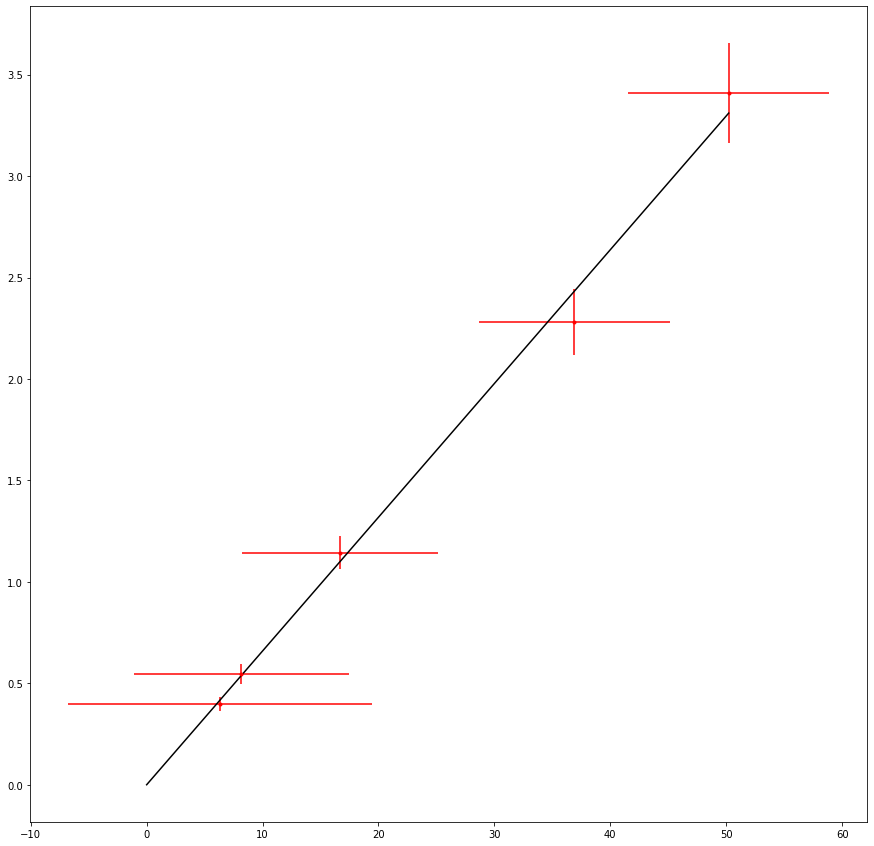

In [56]:
plt.figure(figsize=(15, 15))
plt.errorbar(1000 / d_c, del_y, xerr=1000 * sig_d_c / d_c, yerr=sig_del_y, fmt='.', color='red')
exp5, err_exp5 = sp.curve_fit(fit, 1000 / d_c, del_y)
plt.plot(np.linspace(0, 1000 / d_c.min(), 2), exp5[0] * np.linspace(0, 1000 / d_c.min(), 2), 'black')
#tikz.save('plot2.tex')
exp5
np.linalg.inv((1000 / d_c).reshape((d_c.shape[0], 1)).dot((1000 / d_c).transpose().reshape((1, d_c.shape[0])))).dot((1000 / d_c)).dot(del_y)